## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.85481 | train_mse: 0.52754 | train_mae: 0.57068 |  0:00:00s


epoch 1  | loss: 0.32701 | train_mse: 0.27155 | train_mae: 0.43049 |  0:00:01s


epoch 2  | loss: 0.21516 | train_mse: 0.30674 | train_mae: 0.44156 |  0:00:02s


epoch 3  | loss: 0.20558 | train_mse: 0.21589 | train_mae: 0.3394  |  0:00:02s


epoch 4  | loss: 0.17723 | train_mse: 0.15812 | train_mae: 0.30431 |  0:00:03s


epoch 5  | loss: 0.1516  | train_mse: 0.11624 | train_mae: 0.25392 |  0:00:03s


epoch 6  | loss: 0.18459 | train_mse: 0.10208 | train_mae: 0.24306 |  0:00:04s


epoch 7  | loss: 0.19525 | train_mse: 0.09459 | train_mae: 0.2345  |  0:00:04s


epoch 8  | loss: 0.17177 | train_mse: 0.08461 | train_mae: 0.22247 |  0:00:05s


epoch 9  | loss: 0.11901 | train_mse: 0.08873 | train_mae: 0.23356 |  0:00:06s


epoch 10 | loss: 0.11048 | train_mse: 0.07231 | train_mae: 0.2043  |  0:00:06s


epoch 11 | loss: 0.12365 | train_mse: 0.08142 | train_mae: 0.20786 |  0:00:07s


epoch 12 | loss: 0.0988  | train_mse: 0.06769 | train_mae: 0.19932 |  0:00:08s


epoch 13 | loss: 0.10308 | train_mse: 0.06079 | train_mae: 0.18619 |  0:00:09s


epoch 14 | loss: 0.09574 | train_mse: 0.0701  | train_mae: 0.20187 |  0:00:10s


epoch 15 | loss: 0.09485 | train_mse: 0.07075 | train_mae: 0.19203 |  0:00:11s


epoch 16 | loss: 0.09304 | train_mse: 0.07152 | train_mae: 0.1944  |  0:00:11s


epoch 17 | loss: 0.1198  | train_mse: 0.06152 | train_mae: 0.18689 |  0:00:12s


epoch 18 | loss: 0.07755 | train_mse: 0.05397 | train_mae: 0.1779  |  0:00:13s


epoch 19 | loss: 0.07312 | train_mse: 0.03799 | train_mae: 0.14577 |  0:00:13s


epoch 20 | loss: 0.08316 | train_mse: 0.05735 | train_mae: 0.18677 |  0:00:14s


epoch 21 | loss: 0.08441 | train_mse: 0.04284 | train_mae: 0.15485 |  0:00:15s


epoch 22 | loss: 0.07816 | train_mse: 0.04202 | train_mae: 0.15469 |  0:00:15s


epoch 23 | loss: 0.08035 | train_mse: 0.04948 | train_mae: 0.16894 |  0:00:16s


epoch 24 | loss: 0.07362 | train_mse: 0.05111 | train_mae: 0.16886 |  0:00:16s


epoch 25 | loss: 0.08497 | train_mse: 0.04413 | train_mae: 0.16032 |  0:00:17s


epoch 26 | loss: 0.08687 | train_mse: 0.04375 | train_mae: 0.14965 |  0:00:17s


epoch 27 | loss: 0.06805 | train_mse: 0.04457 | train_mae: 0.15837 |  0:00:18s


epoch 28 | loss: 0.10088 | train_mse: 0.05579 | train_mae: 0.17947 |  0:00:19s


epoch 29 | loss: 0.06418 | train_mse: 0.0423  | train_mae: 0.15731 |  0:00:19s


epoch 30 | loss: 0.08005 | train_mse: 0.05073 | train_mae: 0.17534 |  0:00:20s


epoch 31 | loss: 0.06865 | train_mse: 0.03999 | train_mae: 0.15201 |  0:00:20s


epoch 32 | loss: 0.06618 | train_mse: 0.03511 | train_mae: 0.13829 |  0:00:21s


epoch 33 | loss: 0.05811 | train_mse: 0.04094 | train_mae: 0.15723 |  0:00:21s


epoch 34 | loss: 0.07118 | train_mse: 0.03296 | train_mae: 0.14001 |  0:00:22s


epoch 35 | loss: 0.05568 | train_mse: 0.03404 | train_mae: 0.14449 |  0:00:23s


epoch 36 | loss: 0.07413 | train_mse: 0.07383 | train_mae: 0.201   |  0:00:23s


epoch 37 | loss: 0.07049 | train_mse: 0.03362 | train_mae: 0.14491 |  0:00:24s


epoch 38 | loss: 0.05978 | train_mse: 0.0383  | train_mae: 0.14841 |  0:00:24s


epoch 39 | loss: 0.05517 | train_mse: 0.03304 | train_mae: 0.14077 |  0:00:25s


epoch 40 | loss: 0.06366 | train_mse: 0.0301  | train_mae: 0.1364  |  0:00:25s


epoch 41 | loss: 0.06382 | train_mse: 0.0339  | train_mae: 0.13875 |  0:00:26s


epoch 42 | loss: 0.07709 | train_mse: 0.02706 | train_mae: 0.12537 |  0:00:27s


epoch 43 | loss: 0.0506  | train_mse: 0.02814 | train_mae: 0.13034 |  0:00:27s


epoch 44 | loss: 0.06202 | train_mse: 0.04156 | train_mae: 0.15947 |  0:00:28s


epoch 45 | loss: 0.06737 | train_mse: 0.03948 | train_mae: 0.1531  |  0:00:28s


epoch 46 | loss: 0.0625  | train_mse: 0.03303 | train_mae: 0.13913 |  0:00:29s


epoch 47 | loss: 0.06183 | train_mse: 0.05836 | train_mae: 0.18222 |  0:00:32s


epoch 48 | loss: 0.06386 | train_mse: 0.04249 | train_mae: 0.15695 |  0:00:35s


epoch 49 | loss: 0.05508 | train_mse: 0.03196 | train_mae: 0.14651 |  0:00:36s


epoch 50 | loss: 0.0418  | train_mse: 0.03169 | train_mae: 0.14447 |  0:00:38s


epoch 51 | loss: 0.06477 | train_mse: 0.04752 | train_mae: 0.17096 |  0:00:39s


epoch 52 | loss: 0.0602  | train_mse: 0.02476 | train_mae: 0.12294 |  0:00:40s


epoch 53 | loss: 0.0669  | train_mse: 0.03701 | train_mae: 0.1603  |  0:00:42s


epoch 54 | loss: 0.04974 | train_mse: 0.0276  | train_mae: 0.1272  |  0:00:43s


epoch 55 | loss: 0.05601 | train_mse: 0.02949 | train_mae: 0.13401 |  0:00:45s


epoch 56 | loss: 0.06532 | train_mse: 0.02723 | train_mae: 0.12036 |  0:00:46s


epoch 57 | loss: 0.05793 | train_mse: 0.06611 | train_mae: 0.21254 |  0:00:48s


epoch 58 | loss: 0.0763  | train_mse: 0.03129 | train_mae: 0.1404  |  0:00:49s


epoch 59 | loss: 0.05813 | train_mse: 0.03126 | train_mae: 0.12658 |  0:00:50s


epoch 60 | loss: 0.07306 | train_mse: 0.05805 | train_mae: 0.17496 |  0:00:51s


epoch 61 | loss: 0.05455 | train_mse: 0.03838 | train_mae: 0.15728 |  0:00:52s


epoch 62 | loss: 0.05278 | train_mse: 0.03152 | train_mae: 0.13286 |  0:00:53s


epoch 63 | loss: 0.0408  | train_mse: 0.02203 | train_mae: 0.10697 |  0:00:54s


epoch 64 | loss: 0.04624 | train_mse: 0.0281  | train_mae: 0.12839 |  0:00:54s


epoch 65 | loss: 0.04929 | train_mse: 0.02688 | train_mae: 0.13143 |  0:00:55s


epoch 66 | loss: 0.06388 | train_mse: 0.02251 | train_mae: 0.12099 |  0:00:56s


epoch 67 | loss: 0.05022 | train_mse: 0.01952 | train_mae: 0.10212 |  0:00:57s


epoch 68 | loss: 0.05444 | train_mse: 0.02999 | train_mae: 0.12791 |  0:00:58s


epoch 69 | loss: 0.05923 | train_mse: 0.0294  | train_mae: 0.13381 |  0:01:00s


epoch 70 | loss: 0.0505  | train_mse: 0.02354 | train_mae: 0.11371 |  0:01:01s


epoch 71 | loss: 0.04941 | train_mse: 0.02842 | train_mae: 0.13161 |  0:01:02s


epoch 72 | loss: 0.05486 | train_mse: 0.02099 | train_mae: 0.10702 |  0:01:03s


epoch 73 | loss: 0.03778 | train_mse: 0.01649 | train_mae: 0.09095 |  0:01:04s


epoch 74 | loss: 0.0432  | train_mse: 0.03138 | train_mae: 0.13346 |  0:01:05s


epoch 75 | loss: 0.05248 | train_mse: 0.01552 | train_mae: 0.08332 |  0:01:06s


epoch 76 | loss: 0.03897 | train_mse: 0.02161 | train_mae: 0.10481 |  0:01:06s


epoch 77 | loss: 0.05703 | train_mse: 0.03349 | train_mae: 0.14953 |  0:01:07s


epoch 78 | loss: 0.03846 | train_mse: 0.02551 | train_mae: 0.12014 |  0:01:08s


epoch 79 | loss: 0.03704 | train_mse: 0.03878 | train_mae: 0.13641 |  0:01:09s


epoch 80 | loss: 0.04344 | train_mse: 0.01444 | train_mae: 0.09142 |  0:01:10s


epoch 81 | loss: 0.03661 | train_mse: 0.01751 | train_mae: 0.09908 |  0:01:10s


epoch 82 | loss: 0.02608 | train_mse: 0.02036 | train_mae: 0.10945 |  0:01:11s


epoch 83 | loss: 0.0245  | train_mse: 0.01675 | train_mae: 0.09545 |  0:01:12s


epoch 84 | loss: 0.04085 | train_mse: 0.02144 | train_mae: 0.10084 |  0:01:13s


epoch 85 | loss: 0.0412  | train_mse: 0.02475 | train_mae: 0.11496 |  0:01:13s


epoch 86 | loss: 0.04949 | train_mse: 0.02373 | train_mae: 0.106   |  0:01:14s


epoch 87 | loss: 0.03764 | train_mse: 0.04084 | train_mae: 0.13783 |  0:01:15s


epoch 88 | loss: 0.04712 | train_mse: 0.02732 | train_mae: 0.10682 |  0:01:16s


epoch 89 | loss: 0.02757 | train_mse: 0.02032 | train_mae: 0.10465 |  0:01:17s


epoch 90 | loss: 0.04195 | train_mse: 0.02602 | train_mae: 0.11104 |  0:01:18s


epoch 91 | loss: 0.03279 | train_mse: 0.01569 | train_mae: 0.09865 |  0:01:18s


epoch 92 | loss: 0.04094 | train_mse: 0.01366 | train_mae: 0.08655 |  0:01:19s


epoch 93 | loss: 0.02136 | train_mse: 0.01506 | train_mae: 0.08338 |  0:01:20s


epoch 94 | loss: 0.03307 | train_mse: 0.01738 | train_mae: 0.08843 |  0:01:21s


epoch 95 | loss: 0.03227 | train_mse: 0.01715 | train_mae: 0.09445 |  0:01:22s


epoch 96 | loss: 0.03761 | train_mse: 0.00952 | train_mae: 0.07004 |  0:01:22s


epoch 97 | loss: 0.02926 | train_mse: 0.01286 | train_mae: 0.08194 |  0:01:23s


epoch 98 | loss: 0.03044 | train_mse: 0.01962 | train_mae: 0.10143 |  0:01:24s


epoch 99 | loss: 0.02568 | train_mse: 0.02836 | train_mae: 0.11926 |  0:01:25s


epoch 100| loss: 0.02349 | train_mse: 0.01827 | train_mae: 0.09965 |  0:01:26s


epoch 101| loss: 0.02677 | train_mse: 0.02031 | train_mae: 0.10102 |  0:01:27s


epoch 102| loss: 0.03602 | train_mse: 0.01855 | train_mae: 0.09836 |  0:01:27s


epoch 103| loss: 0.03863 | train_mse: 0.01737 | train_mae: 0.09845 |  0:01:28s


epoch 104| loss: 0.03049 | train_mse: 0.01137 | train_mae: 0.0763  |  0:01:29s


epoch 105| loss: 0.03165 | train_mse: 0.01402 | train_mae: 0.0859  |  0:01:30s


epoch 106| loss: 0.04114 | train_mse: 0.02294 | train_mae: 0.1055  |  0:01:31s


epoch 107| loss: 0.02544 | train_mse: 0.03116 | train_mae: 0.13992 |  0:01:31s


epoch 108| loss: 0.02346 | train_mse: 0.01894 | train_mae: 0.1145  |  0:01:32s


epoch 109| loss: 0.0283  | train_mse: 0.01339 | train_mae: 0.08895 |  0:01:33s


epoch 110| loss: 0.02425 | train_mse: 0.0137  | train_mae: 0.08332 |  0:01:34s


epoch 111| loss: 0.05264 | train_mse: 0.02185 | train_mae: 0.10606 |  0:01:35s


epoch 112| loss: 0.0255  | train_mse: 0.01357 | train_mae: 0.0883  |  0:01:36s


epoch 113| loss: 0.02783 | train_mse: 0.00939 | train_mae: 0.06765 |  0:01:37s


epoch 114| loss: 0.02576 | train_mse: 0.02122 | train_mae: 0.10197 |  0:01:37s


epoch 115| loss: 0.02784 | train_mse: 0.01746 | train_mae: 0.09695 |  0:01:38s


epoch 116| loss: 0.03953 | train_mse: 0.03602 | train_mae: 0.13377 |  0:01:39s


epoch 117| loss: 0.03466 | train_mse: 0.01088 | train_mae: 0.08251 |  0:01:40s


epoch 118| loss: 0.02517 | train_mse: 0.01289 | train_mae: 0.0944  |  0:01:42s


epoch 119| loss: 0.03313 | train_mse: 0.09398 | train_mae: 0.18181 |  0:01:43s


epoch 120| loss: 0.05736 | train_mse: 0.04873 | train_mae: 0.14907 |  0:01:43s


epoch 121| loss: 0.03555 | train_mse: 0.01188 | train_mae: 0.08473 |  0:01:44s


epoch 122| loss: 0.03752 | train_mse: 0.02555 | train_mae: 0.11181 |  0:01:45s


epoch 123| loss: 0.02657 | train_mse: 0.02037 | train_mae: 0.10323 |  0:01:45s


epoch 124| loss: 0.03794 | train_mse: 0.02255 | train_mae: 0.12678 |  0:01:46s


epoch 125| loss: 0.02759 | train_mse: 0.02826 | train_mae: 0.1345  |  0:01:46s


epoch 126| loss: 0.0328  | train_mse: 0.01334 | train_mae: 0.08375 |  0:01:47s


epoch 127| loss: 0.0237  | train_mse: 0.0162  | train_mae: 0.08808 |  0:01:48s


epoch 128| loss: 0.02296 | train_mse: 0.02734 | train_mae: 0.12638 |  0:01:49s


epoch 129| loss: 0.03394 | train_mse: 0.0182  | train_mae: 0.10179 |  0:01:50s


epoch 130| loss: 0.03851 | train_mse: 0.0208  | train_mae: 0.10677 |  0:01:51s


epoch 131| loss: 0.03529 | train_mse: 0.01874 | train_mae: 0.1004  |  0:01:51s


epoch 132| loss: 0.02316 | train_mse: 0.00854 | train_mae: 0.07133 |  0:01:52s


epoch 133| loss: 0.03424 | train_mse: 0.03308 | train_mae: 0.11257 |  0:01:53s


epoch 134| loss: 0.03082 | train_mse: 0.01252 | train_mae: 0.08581 |  0:01:53s


epoch 135| loss: 0.02323 | train_mse: 0.01679 | train_mae: 0.11139 |  0:01:54s


epoch 136| loss: 0.02784 | train_mse: 0.01381 | train_mae: 0.09086 |  0:01:55s


epoch 137| loss: 0.03451 | train_mse: 0.02008 | train_mae: 0.11596 |  0:01:55s


epoch 138| loss: 0.03357 | train_mse: 0.02079 | train_mae: 0.09982 |  0:01:56s


epoch 139| loss: 0.0527  | train_mse: 0.01371 | train_mae: 0.0855  |  0:01:57s


epoch 140| loss: 0.0254  | train_mse: 0.01378 | train_mae: 0.08377 |  0:01:57s


epoch 141| loss: 0.01894 | train_mse: 0.03533 | train_mae: 0.11839 |  0:01:59s


epoch 142| loss: 0.0225  | train_mse: 0.02017 | train_mae: 0.0964  |  0:01:59s


epoch 143| loss: 0.01798 | train_mse: 0.01473 | train_mae: 0.08824 |  0:02:00s


epoch 144| loss: 0.0229  | train_mse: 0.01117 | train_mae: 0.07833 |  0:02:01s


epoch 145| loss: 0.0216  | train_mse: 0.01464 | train_mae: 0.08915 |  0:02:02s


epoch 146| loss: 0.03539 | train_mse: 0.01057 | train_mae: 0.07549 |  0:02:02s


epoch 147| loss: 0.04513 | train_mse: 0.01074 | train_mae: 0.0839  |  0:02:03s


epoch 148| loss: 0.02993 | train_mse: 0.01359 | train_mae: 0.09342 |  0:02:04s


epoch 149| loss: 0.02159 | train_mse: 0.00816 | train_mae: 0.06234 |  0:02:05s


epoch 150| loss: 0.02464 | train_mse: 0.01303 | train_mae: 0.0777  |  0:02:06s


epoch 151| loss: 0.02082 | train_mse: 0.01531 | train_mae: 0.10567 |  0:02:07s


epoch 152| loss: 0.0236  | train_mse: 0.0112  | train_mae: 0.07799 |  0:02:07s


epoch 153| loss: 0.02238 | train_mse: 0.02744 | train_mae: 0.1147  |  0:02:08s


epoch 154| loss: 0.02155 | train_mse: 0.00886 | train_mae: 0.07147 |  0:02:09s


epoch 155| loss: 0.02435 | train_mse: 0.01489 | train_mae: 0.08739 |  0:02:10s


epoch 156| loss: 0.03753 | train_mse: 0.01101 | train_mae: 0.06808 |  0:02:10s


epoch 157| loss: 0.01969 | train_mse: 0.01643 | train_mae: 0.08532 |  0:02:11s


epoch 158| loss: 0.01594 | train_mse: 0.00973 | train_mae: 0.06586 |  0:02:12s


epoch 159| loss: 0.01945 | train_mse: 0.0094  | train_mae: 0.07304 |  0:02:12s


epoch 160| loss: 0.021   | train_mse: 0.01712 | train_mae: 0.10134 |  0:02:13s


epoch 161| loss: 0.0148  | train_mse: 0.01628 | train_mae: 0.09618 |  0:02:13s


epoch 162| loss: 0.02058 | train_mse: 0.00753 | train_mae: 0.06392 |  0:02:14s


epoch 163| loss: 0.01559 | train_mse: 0.01102 | train_mae: 0.06815 |  0:02:15s


epoch 164| loss: 0.03035 | train_mse: 0.02029 | train_mae: 0.08861 |  0:02:15s


epoch 165| loss: 0.02819 | train_mse: 0.01074 | train_mae: 0.07236 |  0:02:16s


epoch 166| loss: 0.01856 | train_mse: 0.01274 | train_mae: 0.07574 |  0:02:16s


epoch 167| loss: 0.02049 | train_mse: 0.01132 | train_mae: 0.07338 |  0:02:17s


epoch 168| loss: 0.01948 | train_mse: 0.01656 | train_mae: 0.08828 |  0:02:18s


epoch 169| loss: 0.0634  | train_mse: 0.01612 | train_mae: 0.08679 |  0:02:18s


epoch 170| loss: 0.03344 | train_mse: 0.01159 | train_mae: 0.07123 |  0:02:19s


epoch 171| loss: 0.02394 | train_mse: 0.0085  | train_mae: 0.06635 |  0:02:19s


epoch 172| loss: 0.02172 | train_mse: 0.00897 | train_mae: 0.06747 |  0:02:20s


epoch 173| loss: 0.03129 | train_mse: 0.00823 | train_mae: 0.06596 |  0:02:20s


epoch 174| loss: 0.04481 | train_mse: 0.00908 | train_mae: 0.07188 |  0:02:21s


epoch 175| loss: 0.02629 | train_mse: 0.01425 | train_mae: 0.07871 |  0:02:21s


epoch 176| loss: 0.02939 | train_mse: 0.01334 | train_mae: 0.08473 |  0:02:22s


epoch 177| loss: 0.0261  | train_mse: 0.0239  | train_mae: 0.10537 |  0:02:22s


epoch 178| loss: 0.02513 | train_mse: 0.0411  | train_mae: 0.13139 |  0:02:23s


epoch 179| loss: 0.01286 | train_mse: 0.00911 | train_mae: 0.0672  |  0:02:24s


epoch 180| loss: 0.01981 | train_mse: 0.00713 | train_mae: 0.06068 |  0:02:24s


epoch 181| loss: 0.02247 | train_mse: 0.00987 | train_mae: 0.07002 |  0:02:25s


epoch 182| loss: 0.01891 | train_mse: 0.0427  | train_mae: 0.13626 |  0:02:25s


epoch 183| loss: 0.01902 | train_mse: 0.01803 | train_mae: 0.09804 |  0:02:26s


epoch 184| loss: 0.02207 | train_mse: 0.00774 | train_mae: 0.07115 |  0:02:27s


epoch 185| loss: 0.03108 | train_mse: 0.00797 | train_mae: 0.06067 |  0:02:27s


epoch 186| loss: 0.01543 | train_mse: 0.00853 | train_mae: 0.07531 |  0:02:28s


epoch 187| loss: 0.03746 | train_mse: 0.01316 | train_mae: 0.08709 |  0:02:28s


epoch 188| loss: 0.01622 | train_mse: 0.01052 | train_mae: 0.06491 |  0:02:29s


epoch 189| loss: 0.02691 | train_mse: 0.00829 | train_mae: 0.06275 |  0:02:29s


epoch 190| loss: 0.01557 | train_mse: 0.00773 | train_mae: 0.06576 |  0:02:30s


epoch 191| loss: 0.02216 | train_mse: 0.00627 | train_mae: 0.05355 |  0:02:31s


epoch 192| loss: 0.0178  | train_mse: 0.00841 | train_mae: 0.07554 |  0:02:31s


epoch 193| loss: 0.01773 | train_mse: 0.00775 | train_mae: 0.06976 |  0:02:32s


epoch 194| loss: 0.01656 | train_mse: 0.01235 | train_mae: 0.09322 |  0:02:32s


epoch 195| loss: 0.04335 | train_mse: 0.01556 | train_mae: 0.09144 |  0:02:33s


epoch 196| loss: 0.021   | train_mse: 0.00876 | train_mae: 0.06832 |  0:02:33s


epoch 197| loss: 0.03418 | train_mse: 0.01141 | train_mae: 0.08491 |  0:02:34s


epoch 198| loss: 0.03345 | train_mse: 0.02855 | train_mae: 0.11867 |  0:02:35s


epoch 199| loss: 0.04102 | train_mse: 0.00861 | train_mae: 0.06543 |  0:02:35s


epoch 200| loss: 0.01861 | train_mse: 0.01271 | train_mae: 0.0891  |  0:02:36s


epoch 201| loss: 0.01824 | train_mse: 0.00917 | train_mae: 0.06674 |  0:02:36s


epoch 202| loss: 0.01946 | train_mse: 0.00749 | train_mae: 0.05921 |  0:02:37s


epoch 203| loss: 0.01969 | train_mse: 0.01121 | train_mae: 0.08515 |  0:02:37s


epoch 204| loss: 0.02502 | train_mse: 0.00604 | train_mae: 0.05316 |  0:02:38s


epoch 205| loss: 0.03079 | train_mse: 0.00776 | train_mae: 0.06074 |  0:02:38s


epoch 206| loss: 0.03002 | train_mse: 0.01047 | train_mae: 0.06994 |  0:02:39s


epoch 207| loss: 0.02279 | train_mse: 0.01578 | train_mae: 0.08731 |  0:02:40s


epoch 208| loss: 0.01584 | train_mse: 0.01398 | train_mae: 0.07153 |  0:02:40s


epoch 209| loss: 0.01273 | train_mse: 0.0184  | train_mae: 0.11199 |  0:02:41s


epoch 210| loss: 0.01323 | train_mse: 0.00602 | train_mae: 0.0581  |  0:02:41s


epoch 211| loss: 0.01814 | train_mse: 0.0082  | train_mae: 0.06151 |  0:02:42s


epoch 212| loss: 0.02019 | train_mse: 0.01531 | train_mae: 0.08823 |  0:02:42s


epoch 213| loss: 0.02461 | train_mse: 0.00892 | train_mae: 0.07436 |  0:02:43s


epoch 214| loss: 0.01664 | train_mse: 0.00801 | train_mae: 0.07314 |  0:02:43s


epoch 215| loss: 0.02421 | train_mse: 0.02385 | train_mae: 0.1227  |  0:02:44s


epoch 216| loss: 0.02058 | train_mse: 0.01322 | train_mae: 0.08172 |  0:02:45s


epoch 217| loss: 0.02072 | train_mse: 0.01372 | train_mae: 0.07664 |  0:02:45s


epoch 218| loss: 0.01575 | train_mse: 0.00826 | train_mae: 0.06602 |  0:02:46s


epoch 219| loss: 0.05139 | train_mse: 0.03504 | train_mae: 0.13324 |  0:02:46s


epoch 220| loss: 0.02292 | train_mse: 0.01547 | train_mae: 0.09624 |  0:02:47s


epoch 221| loss: 0.02188 | train_mse: 0.01219 | train_mae: 0.08466 |  0:02:48s


epoch 222| loss: 0.02369 | train_mse: 0.00922 | train_mae: 0.07077 |  0:02:48s


epoch 223| loss: 0.02394 | train_mse: 0.01657 | train_mae: 0.09647 |  0:02:49s


epoch 224| loss: 0.02343 | train_mse: 0.00745 | train_mae: 0.06861 |  0:02:49s


epoch 225| loss: 0.0204  | train_mse: 0.01084 | train_mae: 0.07949 |  0:02:50s


epoch 226| loss: 0.02042 | train_mse: 0.00741 | train_mae: 0.06325 |  0:02:50s


epoch 227| loss: 0.01631 | train_mse: 0.00949 | train_mae: 0.06903 |  0:02:51s


epoch 228| loss: 0.03794 | train_mse: 0.01524 | train_mae: 0.09082 |  0:02:51s


epoch 229| loss: 0.02757 | train_mse: 0.01132 | train_mae: 0.07206 |  0:02:52s


epoch 230| loss: 0.0235  | train_mse: 0.00903 | train_mae: 0.07487 |  0:02:52s


epoch 231| loss: 0.02166 | train_mse: 0.00913 | train_mae: 0.07631 |  0:02:53s


epoch 232| loss: 0.01438 | train_mse: 0.00637 | train_mae: 0.05676 |  0:02:54s


epoch 233| loss: 0.02225 | train_mse: 0.01379 | train_mae: 0.08846 |  0:02:54s


epoch 234| loss: 0.02835 | train_mse: 0.00789 | train_mae: 0.07172 |  0:02:55s


epoch 235| loss: 0.01712 | train_mse: 0.00928 | train_mae: 0.07392 |  0:02:55s


epoch 236| loss: 0.0225  | train_mse: 0.00679 | train_mae: 0.06161 |  0:02:56s


epoch 237| loss: 0.02986 | train_mse: 0.00754 | train_mae: 0.06293 |  0:02:57s


epoch 238| loss: 0.01263 | train_mse: 0.00914 | train_mae: 0.06835 |  0:02:57s


epoch 239| loss: 0.03084 | train_mse: 0.00995 | train_mae: 0.06882 |  0:02:58s


epoch 240| loss: 0.01369 | train_mse: 0.00685 | train_mae: 0.06537 |  0:02:58s


epoch 241| loss: 0.01633 | train_mse: 0.0066  | train_mae: 0.0629  |  0:02:59s


epoch 242| loss: 0.01338 | train_mse: 0.00874 | train_mae: 0.07894 |  0:02:59s


epoch 243| loss: 0.02116 | train_mse: 0.00585 | train_mae: 0.0532  |  0:03:00s


epoch 244| loss: 0.01497 | train_mse: 0.00724 | train_mae: 0.06139 |  0:03:00s


epoch 245| loss: 0.012   | train_mse: 0.00862 | train_mae: 0.06683 |  0:03:01s


epoch 246| loss: 0.02634 | train_mse: 0.00707 | train_mae: 0.0688  |  0:03:02s


epoch 247| loss: 0.01782 | train_mse: 0.02108 | train_mae: 0.12742 |  0:03:02s


epoch 248| loss: 0.01615 | train_mse: 0.01    | train_mae: 0.0673  |  0:03:03s


epoch 249| loss: 0.01631 | train_mse: 0.00501 | train_mae: 0.05314 |  0:03:03s


epoch 250| loss: 0.01417 | train_mse: 0.00497 | train_mae: 0.0549  |  0:03:04s


epoch 251| loss: 0.01608 | train_mse: 0.00611 | train_mae: 0.0536  |  0:03:04s


epoch 252| loss: 0.0203  | train_mse: 0.00716 | train_mae: 0.05672 |  0:03:05s


epoch 253| loss: 0.01451 | train_mse: 0.00595 | train_mae: 0.05949 |  0:03:05s


epoch 254| loss: 0.02145 | train_mse: 0.01121 | train_mae: 0.07104 |  0:03:06s


epoch 255| loss: 0.01994 | train_mse: 0.0137  | train_mae: 0.0835  |  0:03:07s


epoch 256| loss: 0.02012 | train_mse: 0.00614 | train_mae: 0.0555  |  0:03:07s


epoch 257| loss: 0.02326 | train_mse: 0.03644 | train_mae: 0.11105 |  0:03:08s


epoch 258| loss: 0.02703 | train_mse: 0.00428 | train_mae: 0.05075 |  0:03:08s


epoch 259| loss: 0.01691 | train_mse: 0.05603 | train_mae: 0.14134 |  0:03:09s


epoch 260| loss: 0.02085 | train_mse: 0.03178 | train_mae: 0.11779 |  0:03:09s


epoch 261| loss: 0.03512 | train_mse: 0.02871 | train_mae: 0.10564 |  0:03:10s


epoch 262| loss: 0.0151  | train_mse: 0.01071 | train_mae: 0.0733  |  0:03:11s


epoch 263| loss: 0.01963 | train_mse: 0.00471 | train_mae: 0.05237 |  0:03:11s


epoch 264| loss: 0.0184  | train_mse: 0.0053  | train_mae: 0.05301 |  0:03:12s


epoch 265| loss: 0.02049 | train_mse: 0.0061  | train_mae: 0.05935 |  0:03:12s


epoch 266| loss: 0.02166 | train_mse: 0.00487 | train_mae: 0.04969 |  0:03:13s


epoch 267| loss: 0.02981 | train_mse: 0.01077 | train_mae: 0.06821 |  0:03:13s


epoch 268| loss: 0.01547 | train_mse: 0.00526 | train_mae: 0.05415 |  0:03:14s


epoch 269| loss: 0.01389 | train_mse: 0.00625 | train_mae: 0.06243 |  0:03:14s


epoch 270| loss: 0.01684 | train_mse: 0.00694 | train_mae: 0.0578  |  0:03:15s


epoch 271| loss: 0.01259 | train_mse: 0.00583 | train_mae: 0.04988 |  0:03:16s


epoch 272| loss: 0.02132 | train_mse: 0.00773 | train_mae: 0.06314 |  0:03:16s


epoch 273| loss: 0.02385 | train_mse: 0.00926 | train_mae: 0.07026 |  0:03:17s


epoch 274| loss: 0.04033 | train_mse: 0.02287 | train_mae: 0.09573 |  0:03:17s


epoch 275| loss: 0.0245  | train_mse: 0.00967 | train_mae: 0.08053 |  0:03:18s


epoch 276| loss: 0.01591 | train_mse: 0.00509 | train_mae: 0.05491 |  0:03:18s


epoch 277| loss: 0.01295 | train_mse: 0.00456 | train_mae: 0.05116 |  0:03:19s


epoch 278| loss: 0.02028 | train_mse: 0.00477 | train_mae: 0.05259 |  0:03:19s


epoch 279| loss: 0.02267 | train_mse: 0.00759 | train_mae: 0.07111 |  0:03:20s


epoch 280| loss: 0.02352 | train_mse: 0.00704 | train_mae: 0.06186 |  0:03:21s


epoch 281| loss: 0.01495 | train_mse: 0.00659 | train_mae: 0.06002 |  0:03:21s


epoch 282| loss: 0.0232  | train_mse: 0.00898 | train_mae: 0.07328 |  0:03:22s


epoch 283| loss: 0.01254 | train_mse: 0.00464 | train_mae: 0.04944 |  0:03:22s


epoch 284| loss: 0.01419 | train_mse: 0.00498 | train_mae: 0.04983 |  0:03:23s


epoch 285| loss: 0.01429 | train_mse: 0.00584 | train_mae: 0.05433 |  0:03:23s


epoch 286| loss: 0.01338 | train_mse: 0.00806 | train_mae: 0.05943 |  0:03:24s


epoch 287| loss: 0.01471 | train_mse: 0.00534 | train_mae: 0.05089 |  0:03:24s


epoch 288| loss: 0.02085 | train_mse: 0.00528 | train_mae: 0.05299 |  0:03:25s


epoch 289| loss: 0.01729 | train_mse: 0.00426 | train_mae: 0.05027 |  0:03:25s


epoch 290| loss: 0.02676 | train_mse: 0.00447 | train_mae: 0.05328 |  0:03:26s


epoch 291| loss: 0.01775 | train_mse: 0.01079 | train_mae: 0.08096 |  0:03:27s


epoch 292| loss: 0.01771 | train_mse: 0.00706 | train_mae: 0.07301 |  0:03:27s


epoch 293| loss: 0.02322 | train_mse: 0.00817 | train_mae: 0.06221 |  0:03:28s


epoch 294| loss: 0.01705 | train_mse: 0.0055  | train_mae: 0.05227 |  0:03:28s


epoch 295| loss: 0.02137 | train_mse: 0.00587 | train_mae: 0.06282 |  0:03:29s


epoch 296| loss: 0.01554 | train_mse: 0.00935 | train_mae: 0.08184 |  0:03:29s


epoch 297| loss: 0.01286 | train_mse: 0.00388 | train_mae: 0.04491 |  0:03:30s


epoch 298| loss: 0.01817 | train_mse: 0.00598 | train_mae: 0.05696 |  0:03:31s


epoch 299| loss: 0.02292 | train_mse: 0.00631 | train_mae: 0.05661 |  0:03:31s


epoch 300| loss: 0.02382 | train_mse: 0.0067  | train_mae: 0.06585 |  0:03:32s


epoch 301| loss: 0.01265 | train_mse: 0.0087  | train_mae: 0.06406 |  0:03:32s


epoch 302| loss: 0.01268 | train_mse: 0.00914 | train_mae: 0.0742  |  0:03:33s


epoch 303| loss: 0.01617 | train_mse: 0.01279 | train_mae: 0.08501 |  0:03:33s


epoch 304| loss: 0.02022 | train_mse: 0.00622 | train_mae: 0.06073 |  0:03:34s


epoch 305| loss: 0.02076 | train_mse: 0.00836 | train_mae: 0.0703  |  0:03:34s


epoch 306| loss: 0.01815 | train_mse: 0.01041 | train_mae: 0.06913 |  0:03:35s


epoch 307| loss: 0.01387 | train_mse: 0.00799 | train_mae: 0.06811 |  0:03:36s


epoch 308| loss: 0.00989 | train_mse: 0.00512 | train_mae: 0.05436 |  0:03:36s


epoch 309| loss: 0.01728 | train_mse: 0.00529 | train_mae: 0.0531  |  0:03:37s


epoch 310| loss: 0.01876 | train_mse: 0.00979 | train_mae: 0.07895 |  0:03:37s


epoch 311| loss: 0.02117 | train_mse: 0.0178  | train_mae: 0.08871 |  0:03:38s


epoch 312| loss: 0.01476 | train_mse: 0.00848 | train_mae: 0.06408 |  0:03:38s


epoch 313| loss: 0.02582 | train_mse: 0.01275 | train_mae: 0.08371 |  0:03:39s


epoch 314| loss: 0.02864 | train_mse: 0.01177 | train_mae: 0.0762  |  0:03:39s


epoch 315| loss: 0.01794 | train_mse: 0.00792 | train_mae: 0.06856 |  0:03:40s


epoch 316| loss: 0.01936 | train_mse: 0.04277 | train_mae: 0.10068 |  0:03:41s


epoch 317| loss: 0.01403 | train_mse: 0.0178  | train_mae: 0.0697  |  0:03:41s


epoch 318| loss: 0.01605 | train_mse: 0.00628 | train_mae: 0.05629 |  0:03:42s


epoch 319| loss: 0.01674 | train_mse: 0.00758 | train_mae: 0.06409 |  0:03:42s


epoch 320| loss: 0.03057 | train_mse: 0.01196 | train_mae: 0.08153 |  0:03:43s


epoch 321| loss: 0.01892 | train_mse: 0.0044  | train_mae: 0.04429 |  0:03:43s


epoch 322| loss: 0.0175  | train_mse: 0.00455 | train_mae: 0.04614 |  0:03:44s


epoch 323| loss: 0.01298 | train_mse: 0.00529 | train_mae: 0.05558 |  0:03:44s


epoch 324| loss: 0.01643 | train_mse: 0.00653 | train_mae: 0.06782 |  0:03:45s


epoch 325| loss: 0.01604 | train_mse: 0.01418 | train_mae: 0.09294 |  0:03:45s


epoch 326| loss: 0.02242 | train_mse: 0.00832 | train_mae: 0.07416 |  0:03:46s


epoch 327| loss: 0.01755 | train_mse: 0.01097 | train_mae: 0.0895  |  0:03:47s


epoch 328| loss: 0.02866 | train_mse: 0.00992 | train_mae: 0.08188 |  0:03:47s


epoch 329| loss: 0.01658 | train_mse: 0.00449 | train_mae: 0.04771 |  0:03:48s


epoch 330| loss: 0.01639 | train_mse: 0.00437 | train_mae: 0.05104 |  0:03:48s


epoch 331| loss: 0.01917 | train_mse: 0.00531 | train_mae: 0.05512 |  0:03:49s


epoch 332| loss: 0.01271 | train_mse: 0.05972 | train_mae: 0.13477 |  0:03:49s


epoch 333| loss: 0.01802 | train_mse: 0.00788 | train_mae: 0.07287 |  0:03:50s


epoch 334| loss: 0.01753 | train_mse: 0.01065 | train_mae: 0.0868  |  0:03:50s


epoch 335| loss: 0.02619 | train_mse: 0.00892 | train_mae: 0.07571 |  0:03:51s


epoch 336| loss: 0.01924 | train_mse: 0.10148 | train_mae: 0.15061 |  0:03:52s


epoch 337| loss: 0.02046 | train_mse: 0.00808 | train_mae: 0.06094 |  0:03:52s


epoch 338| loss: 0.02817 | train_mse: 0.01074 | train_mae: 0.07295 |  0:03:53s


epoch 339| loss: 0.01409 | train_mse: 0.00576 | train_mae: 0.05463 |  0:03:53s


epoch 340| loss: 0.02387 | train_mse: 0.00693 | train_mae: 0.05841 |  0:03:54s


epoch 341| loss: 0.02678 | train_mse: 0.01161 | train_mae: 0.07708 |  0:03:54s


epoch 342| loss: 0.01658 | train_mse: 0.0089  | train_mae: 0.06718 |  0:03:55s


epoch 343| loss: 0.01434 | train_mse: 0.00532 | train_mae: 0.05826 |  0:03:56s


epoch 344| loss: 0.01477 | train_mse: 0.00619 | train_mae: 0.06441 |  0:03:56s


epoch 345| loss: 0.01884 | train_mse: 0.00808 | train_mae: 0.07539 |  0:03:57s


epoch 346| loss: 0.01602 | train_mse: 0.00576 | train_mae: 0.05564 |  0:03:57s


epoch 347| loss: 0.01376 | train_mse: 0.00665 | train_mae: 0.06298 |  0:03:58s


epoch 348| loss: 0.01338 | train_mse: 0.00606 | train_mae: 0.05391 |  0:03:59s


epoch 349| loss: 0.02268 | train_mse: 0.00904 | train_mae: 0.07431 |  0:03:59s


epoch 350| loss: 0.02764 | train_mse: 0.00794 | train_mae: 0.0692  |  0:04:00s


epoch 351| loss: 0.02107 | train_mse: 0.00697 | train_mae: 0.06069 |  0:04:00s


epoch 352| loss: 0.02719 | train_mse: 0.00769 | train_mae: 0.0698  |  0:04:01s


epoch 353| loss: 0.01529 | train_mse: 0.00386 | train_mae: 0.04826 |  0:04:01s


epoch 354| loss: 0.01131 | train_mse: 0.00667 | train_mae: 0.06232 |  0:04:02s


epoch 355| loss: 0.01863 | train_mse: 0.00701 | train_mae: 0.05941 |  0:04:02s


epoch 356| loss: 0.0127  | train_mse: 0.00653 | train_mae: 0.05893 |  0:04:03s


epoch 357| loss: 0.01186 | train_mse: 0.00656 | train_mae: 0.05731 |  0:04:04s


epoch 358| loss: 0.01256 | train_mse: 0.00569 | train_mae: 0.05088 |  0:04:04s


epoch 359| loss: 0.01191 | train_mse: 0.00856 | train_mae: 0.06512 |  0:04:05s


epoch 360| loss: 0.01504 | train_mse: 0.01634 | train_mae: 0.09529 |  0:04:05s


epoch 361| loss: 0.01299 | train_mse: 0.00779 | train_mae: 0.05813 |  0:04:06s


epoch 362| loss: 0.01446 | train_mse: 0.0058  | train_mae: 0.05744 |  0:04:06s


epoch 363| loss: 0.03707 | train_mse: 0.00664 | train_mae: 0.05887 |  0:04:07s


epoch 364| loss: 0.02664 | train_mse: 0.0067  | train_mae: 0.06231 |  0:04:07s


epoch 365| loss: 0.01637 | train_mse: 0.00544 | train_mae: 0.06107 |  0:04:08s


epoch 366| loss: 0.02533 | train_mse: 0.00942 | train_mae: 0.07033 |  0:04:09s


epoch 367| loss: 0.02158 | train_mse: 0.01927 | train_mae: 0.08927 |  0:04:09s


epoch 368| loss: 0.01261 | train_mse: 0.00445 | train_mae: 0.04671 |  0:04:10s


epoch 369| loss: 0.01162 | train_mse: 0.00758 | train_mae: 0.06863 |  0:04:10s


epoch 370| loss: 0.01934 | train_mse: 0.01567 | train_mae: 0.08876 |  0:04:11s


epoch 371| loss: 0.01466 | train_mse: 0.00692 | train_mae: 0.06117 |  0:04:11s

Early stopping occurred at epoch 371 with best_epoch = 321 and best_train_mae = 0.04429
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.04381593055908826


ABC Pre-generator MAE 0.7958865566727968


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

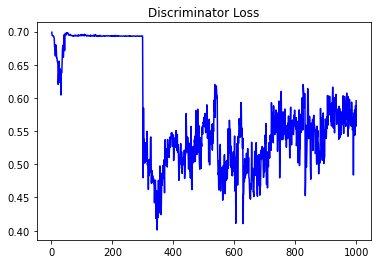

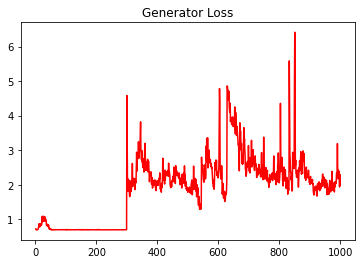

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.1380310308313989


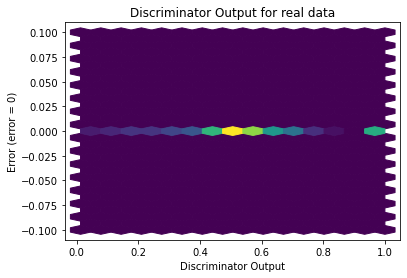

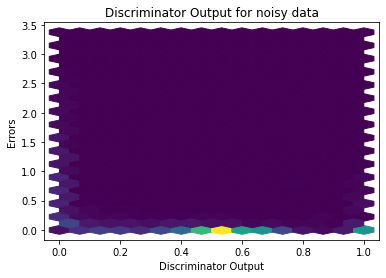

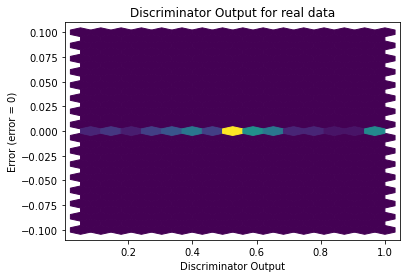

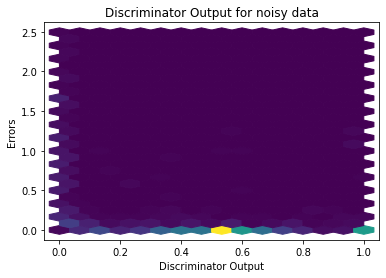

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

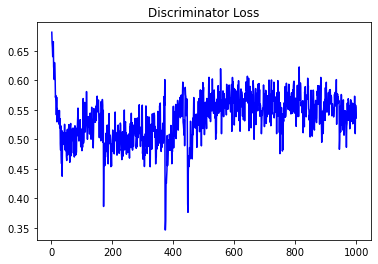

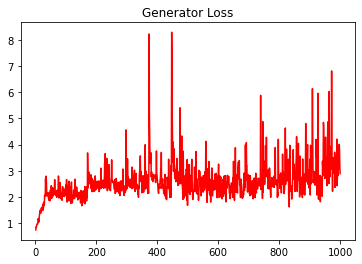

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.07786601451310245


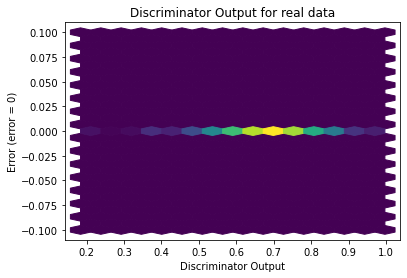

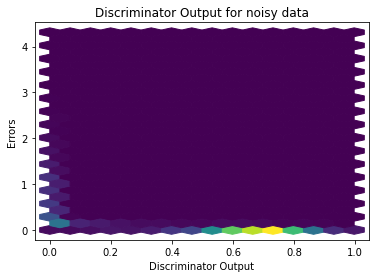

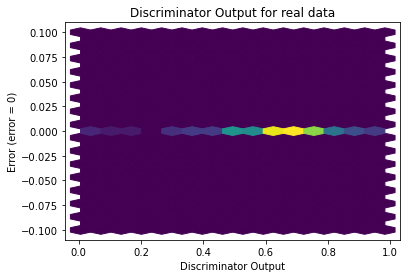

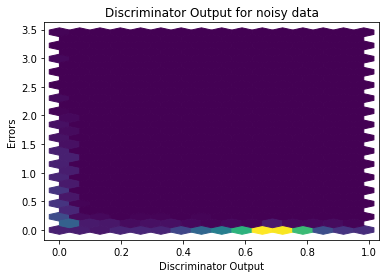

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


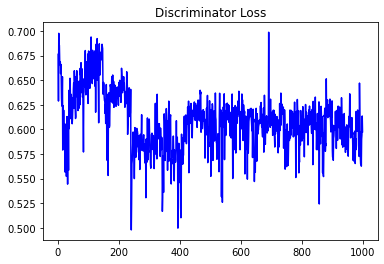

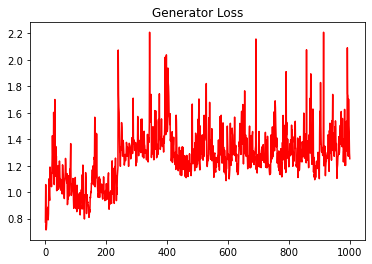

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.11839470003743643


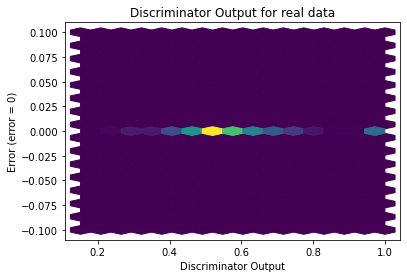

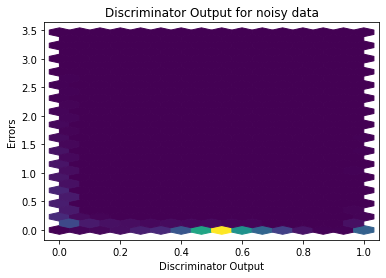

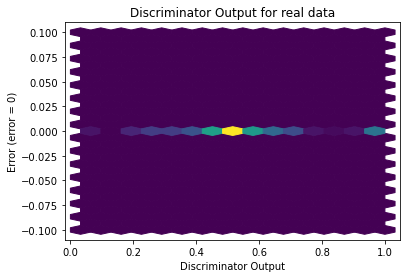

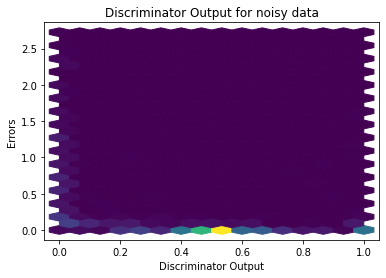

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


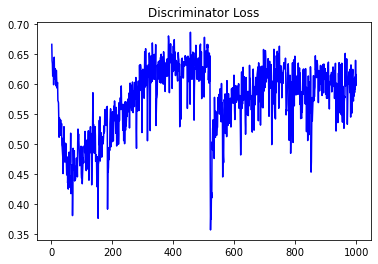

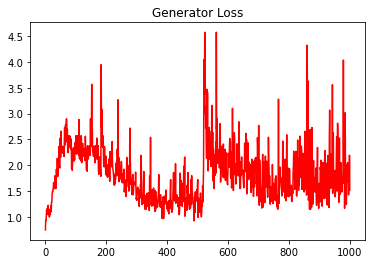

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.07080889928868259


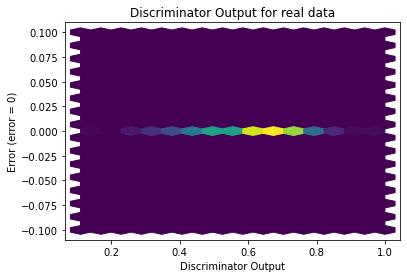

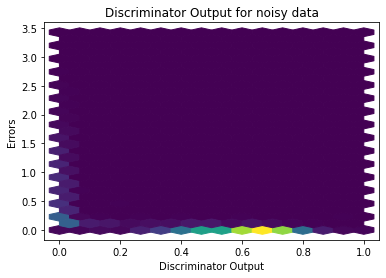

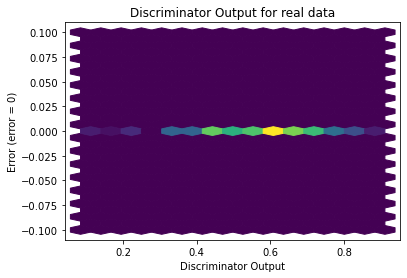

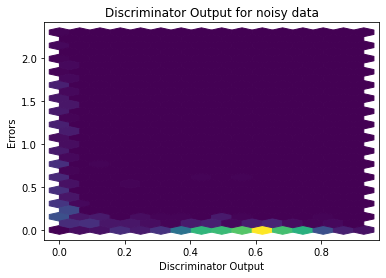

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9353]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], requires_grad=True)
